# 关联分析

**使用关联分析，分析一份调查问卷，对其中的十几个单选题尽进行关联分析，发现其中的规则**

In [1]:
## 加载包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
## 图像在jupyter notebook中显示
%matplotlib inline
## 显示的图片格式（mac中的高清格式），还可以设置为"bmp"等格式
%config InlineBackend.figure_format = "retina"
## 输出图显示中文
from matplotlib.font_manager import FontProperties
fonts = FontProperties(fname = "/Library/Fonts/华文细黑.ttf",size=14)
## 引入3D坐标系
from mpl_toolkits.mplot3d import Axes3D
## cm模块提供大量的colormap函数
from matplotlib import cm
import matplotlib as mpl
## 挖掘频繁项集和关联规则
from mlxtend.frequent_patterns import apriori,association_rules  
from mlxtend.preprocessing import TransactionEncoder


In [2]:
## 读取数据,该睡都是选择提
datadf = pd.read_excel("data/chap6/调查问卷2.xls")
datadf.head()

,序号,(1)您的年级？,(2)您的专业类型?,(3):您的性别?,(4):是否为独生子女?,(5):是否恋爱?,(6):认为自己属于那种性格?,7、您经常看真人秀节目吗？,9、你对于喜欢的真人秀节目是否会多次观看？,12、你是更接受原创真人秀节目还是国外引进的？,13、你和朋友们的话题中会讨论电视真人秀节目吗？,18、你认为明星真人秀节目真实性如何？,19、你是否觉得现在的真人秀节目广告插播过于严重？,23、你赞成大力发展真人秀节目吗？
0,6,大三,理工科,女,不是独生子女,在恋爱,两种兼有,一周两到三次,会多次观看,都能接受,经常讨论,节目真实性一般,正常毕竟节目也要正常运转,赞成可以娱乐
1,7,大三,理工科,女,不是独生子女,在恋爱,内向,一周两到三次,一遍就够,国内原创,经常讨论,节目真实性一般,正常毕竟节目也要正常运转,无所谓
2,8,大三,理工科,男,不是独生子女,在恋爱,两种兼有,不确定是否会看,会多次观看,都能接受,经常讨论,节目真实性一般,正常毕竟节目也要正常运转,无所谓
3,9,大三,理工科,女,不是独生子女,在恋爱,内向,一周两到三次,一遍就够,都能接受,经常讨论,节目真实性一般,正常毕竟节目也要正常运转,赞成可以娱乐
4,10,大三,理工科,女,不是独生子女,未恋爱,两种兼有,一周两到三次,一遍就够,都能接受,经常讨论,节目真实性一般,正常毕竟节目也要正常运转,赞成可以娱乐


In [3]:
## 查看所有的选项中，每个选项的出现次数
dataflatten = np.array(datadf.iloc[:,1::]).flatten()
dataflatten = pd.DataFrame({"value":dataflatten})
dataflatten.head()

,value
0,大三
1,理工科
2,女
3,不是独生子女
4,在恋爱


In [4]:
## 计算出现的频次
datafre = dataflatten.groupby(by=["value"])["value"].count()
## 整理未数据表
datafre = pd.DataFrame({"Item":datafre.index,"Freq":datafre.values}).sort_values("Freq",ascending=0)

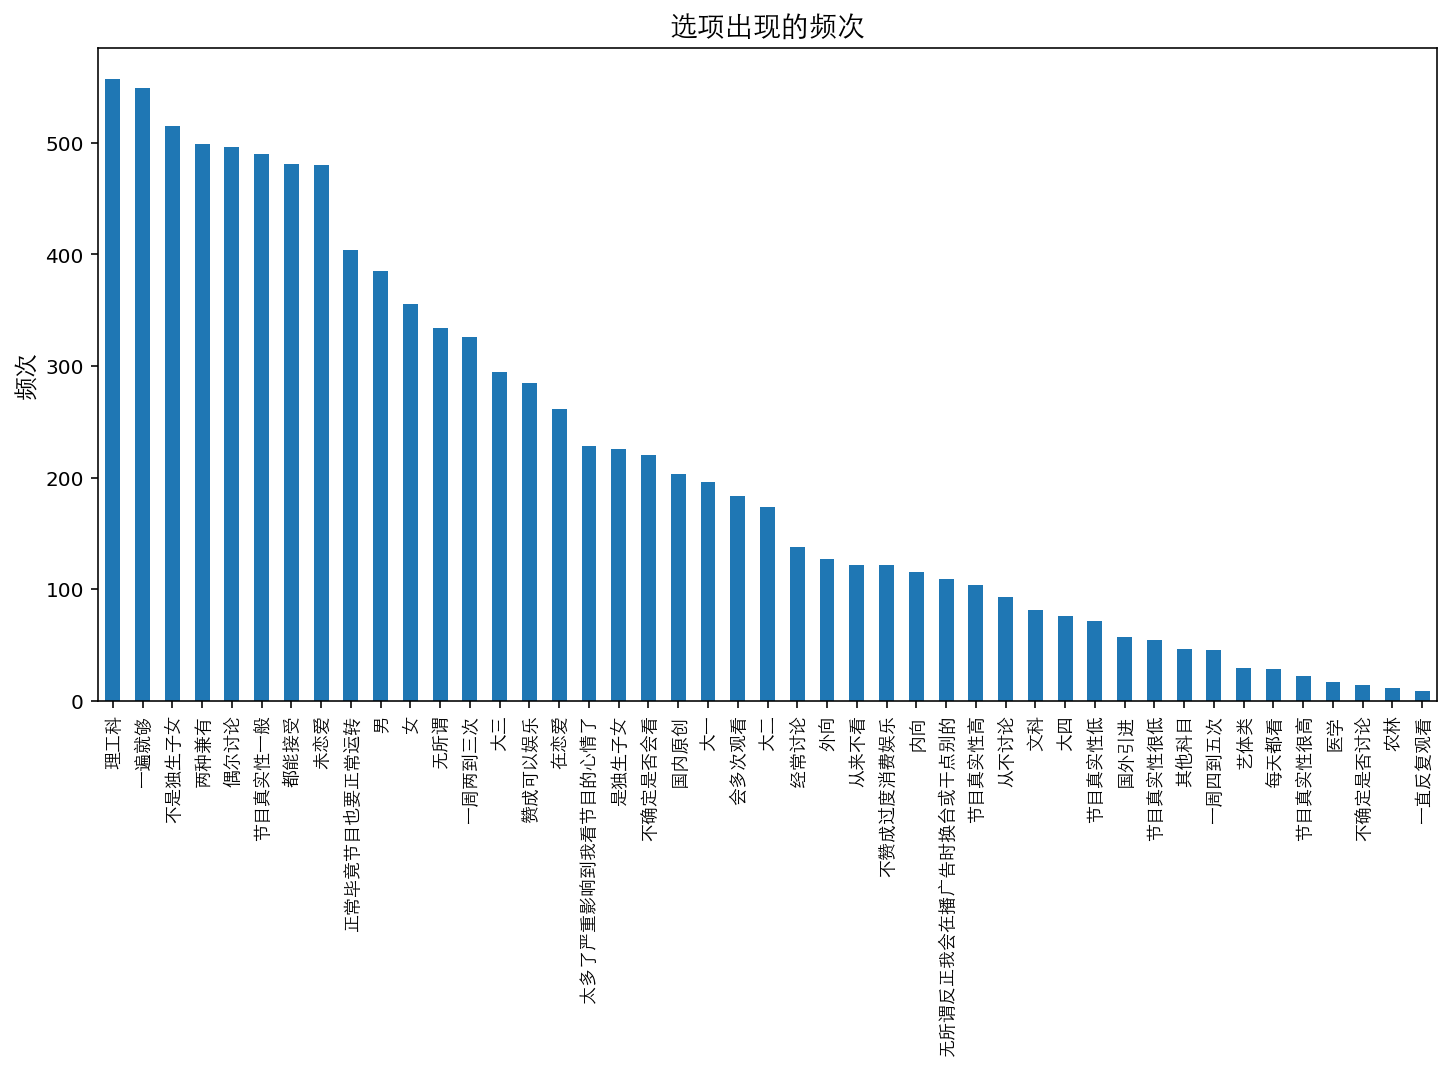

In [5]:
## 绘制直方图
datafre.plot(kind = "bar",figsize = (12,6),legend=None)
plt.title("选项出现的频次",fontproperties = fonts)
plt.ylabel("频次",fontproperties = fonts,size = 12)
plt.xlabel("")
plt.xticks(range(len(datafre)),datafre["Item"],rotation=90,fontproperties = fonts,size = 9)
plt.show()

In [6]:
## 对数据集进行编码
datanew = np.array(datadf.iloc[:,1::])
oht = TransactionEncoder()
oht_ary = oht.fit(datanew).transform(datanew)
## 将编码后的数据集做成数据表，每列为各个选项
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df.head()
## 该数据集有700多个样本，一共有45个可选项目

,一周两到三次,一周四到五次,一直反复观看,一遍就够,不是独生子女,不确定是否会看,不确定是否讨论,不赞成过度消费娱乐,两种兼有,从不讨论,...,男,经常讨论,艺体类,节目真实性一般,节目真实性低,节目真实性很低,节目真实性很高,节目真实性高,赞成可以娱乐,都能接受
0,True,False,False,False,True,False,False,False,True,False,...,False,True,False,True,False,False,False,False,True,True
1,True,False,False,True,True,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,True,False,...,True,True,False,True,False,False,False,False,False,True
3,True,False,False,True,True,False,False,False,False,False,...,False,True,False,True,False,False,False,False,True,True
4,True,False,False,True,True,False,False,False,True,False,...,False,True,False,True,False,False,False,False,True,True


In [7]:
## 发现频繁项集，最小支持度为0.3
df_fre = apriori(df, min_support=0.3,use_colnames=True)
## 为找到的频繁项目添加项目长度
df_fre["length"] = df_fre["itemsets"].apply(lambda x: len(x))
print(df_fre.shape)
## 可以发现我们找到了出现最小支持度＝0.3的规则有138个
## 查看频繁项集中至少包含两个元素的项目
df_fre_len2 = df_fre[df_fre["length"]>1]
print(df_fre_len2.shape)
df_fre_len2.sample(5)
## 至少包含两个项目的频繁项集有120个

(138, 3)
(120, 3)


,support,itemsets,length
63,0.303644,"(理工科, 大三)",2
56,0.307692,"(无所谓, 偶尔讨论)",2
101,0.314440,"(未恋爱, 一遍就够, 都能接受)",3
135,0.317139,"(未恋爱, 理工科, 都能接受)",3
102,0.304993,"(理工科, 正常毕竟节目也要正常运转, 一遍就够)",3


In [8]:
## 找到关联规则，通过提升度阈值发现规则
rule1 = association_rules(df_fre, metric="lift", min_threshold=1.1)
## 计算前提（antecedents）的长度
rule1["antelen"] = rule1.antecedents.apply(lambda x:len(x))
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antelen
0,(节目真实性一般),(无所谓),0.661269,0.450742,0.327935,0.495918,1.100226,0.029874,1.089621,1
1,(无所谓),(节目真实性一般),0.450742,0.661269,0.327935,0.727545,1.100226,0.029874,1.243256,1
2,(理工科),(男),0.751687,0.519568,0.448043,0.596050,1.147203,0.057491,1.189336,1
3,(男),(理工科),0.519568,0.751687,0.448043,0.862338,1.147203,0.057491,1.803784,1
4,"(理工科, 一遍就够)",(男),0.561404,0.519568,0.348178,0.620192,1.193669,0.056491,1.264934,2
5,"(一遍就够, 男)",(理工科),0.398111,0.751687,0.348178,0.874576,1.163485,0.048924,1.979794,2
6,(理工科),"(一遍就够, 男)",0.751687,0.398111,0.348178,0.463196,1.163485,0.048924,1.121245,1
7,(男),"(理工科, 一遍就够)",0.519568,0.561404,0.348178,0.670130,1.193669,0.056491,1.329604,1
8,"(理工科, 偶尔讨论)",(男),0.515520,0.519568,0.317139,0.615183,1.184028,0.049291,1.248469,2
9,"(男, 偶尔讨论)",(理工科),0.364372,0.751687,0.317139,0.870370,1.157889,0.043245,1.915558,2


In [9]:
## 找到置信度 >0.7,前提长度>1的规则
rule1[(rule1.antelen>1)&(rule1.confidence>0.7)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antelen
5,"(一遍就够, 男)",(理工科),0.398111,0.751687,0.348178,0.874576,1.163485,0.048924,1.979794,2
9,"(男, 偶尔讨论)",(理工科),0.364372,0.751687,0.317139,0.870370,1.157889,0.043245,1.915558,2


**可以发现男性如果对真人秀的节目并没有很高的兴趣（一遍就够或偶尔讨论）通常都是理工男**

In [10]:
## 找到关联规则，通过置信度阈值发现规则
rule2 = association_rules(df_fre, metric="confidence", min_threshold=0.7)
rule2["antelen"] = rule2.antecedents.apply(lambda x:len(x))
rule2 = rule2[(rule2.antelen == 1) & (rule2.lift > 1)]
rule2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antelen
0,(一周两到三次),(一遍就够),0.439946,0.740891,0.329285,0.748466,1.010225,0.003333,1.030118,1
1,(一周两到三次),(偶尔讨论),0.439946,0.669366,0.313090,0.711656,1.063180,0.018606,1.146668,1
3,(一周两到三次),(节目真实性一般),0.439946,0.661269,0.311741,0.708589,1.071560,0.020818,1.162384,1
4,(不是独生子女),(一遍就够),0.695007,0.740891,0.516869,0.743689,1.003777,0.001945,1.010919,1
5,(两种兼有),(一遍就够),0.673414,0.740891,0.503374,0.747495,1.008914,0.004447,1.026155,1
7,(大三),(一遍就够),0.398111,0.740891,0.318489,0.800000,1.079781,0.023532,1.295547,1
9,(无所谓),(一遍就够),0.450742,0.740891,0.338731,0.751497,1.014316,0.004781,1.042681,1
10,(未恋爱),(一遍就够),0.647773,0.740891,0.483131,0.745833,1.006671,0.003202,1.019446,1
11,(正常毕竟节目也要正常运转),(一遍就够),0.545209,0.740891,0.407557,0.747525,1.008954,0.003617,1.026276,1
12,(理工科),(一遍就够),0.751687,0.740891,0.561404,0.746858,1.008054,0.004486,1.023574,1


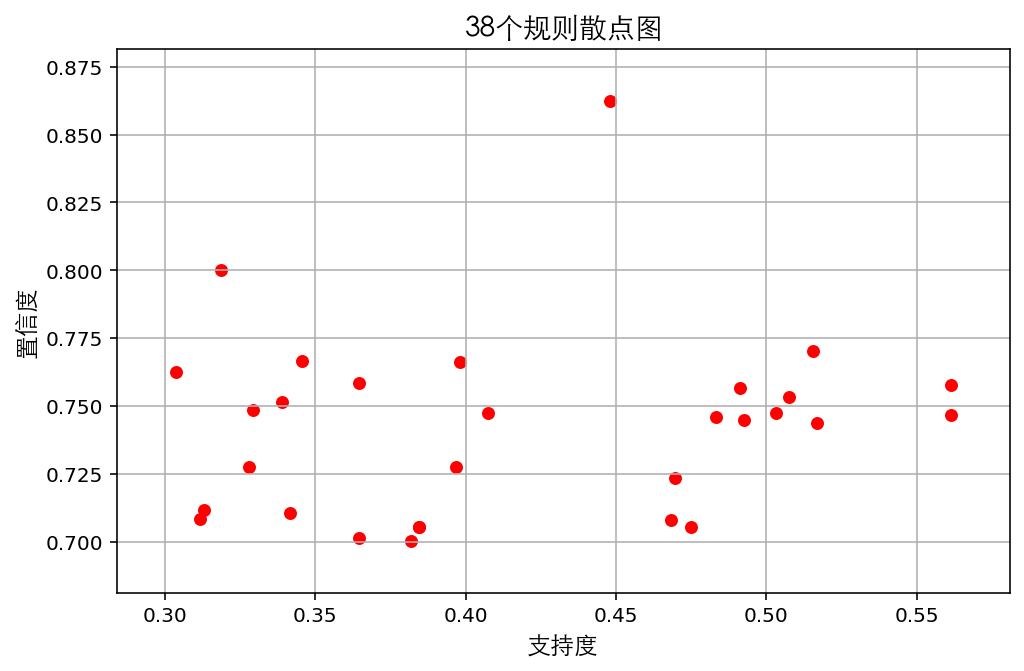

In [11]:
## 绘制支持度和置信度的散点图
rule2.plot(kind="scatter",x = "support",c = "r",
           y = "confidence",s = 30,figsize=(8,5))
plt.grid("on")
plt.xlabel("支持度",FontProperties = fonts,size = 12)
plt.ylabel("置信度",FontProperties = fonts,size = 12)
plt.title("38个规则散点图",FontProperties = fonts)
plt.show()

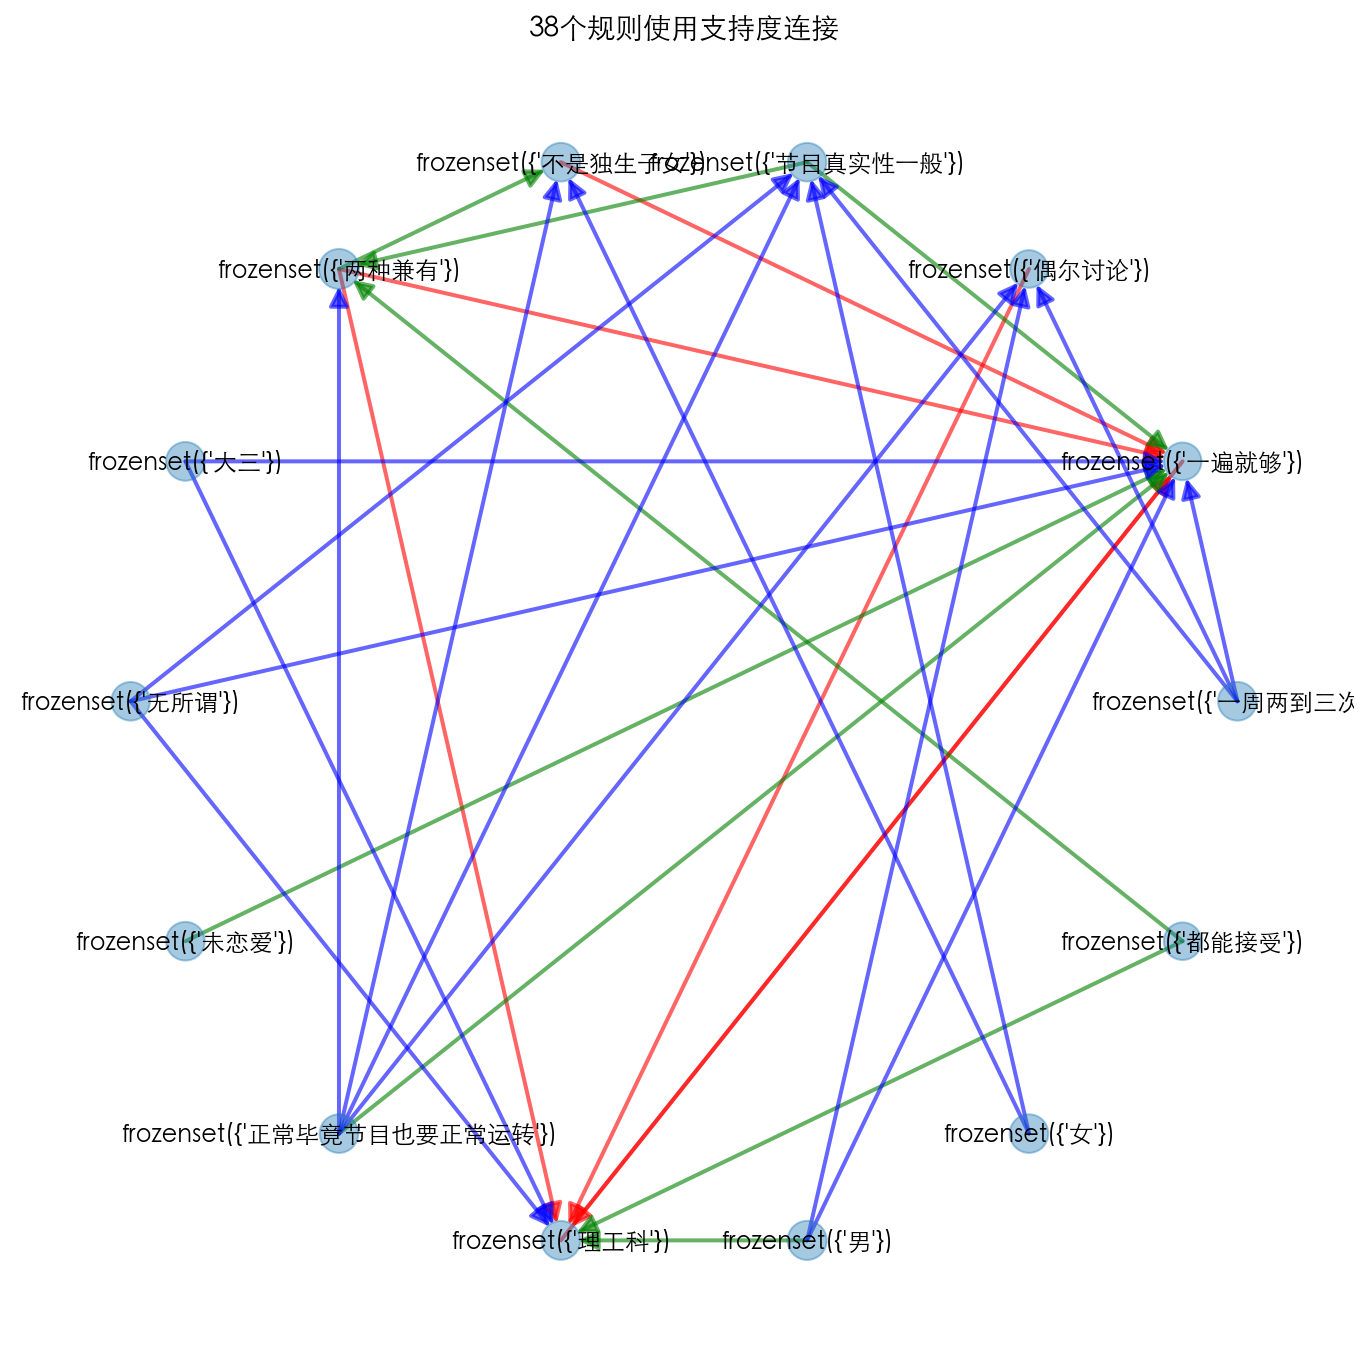

In [12]:
## 将部分关联规则使用关系网络图进行可视化
import networkx as nx
plt.figure(figsize=(12,12))
## 生成社交网络图
G=nx.DiGraph()

## 为图像添加边
for ii in rule2.index:
    G.add_edge(rule2.antecedents[ii],rule2.consequents[ii],weight = rule2.support[ii])
    
## 定义3种边
elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0.5]
emidle=[(u,v) for (u,v,d) in G.edges(data=True) if (d['weight'] <= 0.5)&(d['weight'] >= 0.4)]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <= 0.4]

## 图的布局方式
pos=nx.circular_layout(G)

# 根据规则的置信度节点的大小
nx.draw_networkx_nodes(G,pos,alpha=0.4,node_size=rule2.confidence * 500)

# 设置边的形式
nx.draw_networkx_edges(G,pos,edgelist=elarge,width=2,
                       alpha=0.6,edge_color='r',arrowsize=20)
nx.draw_networkx_edges(G,pos,edgelist=emidle,width=2,
                       alpha=0.6,edge_color='g',arrowsize=20)
nx.draw_networkx_edges(G,pos,edgelist=esmall,width=2,
                       alpha=0.6,edge_color='b',arrowsize=20)

# 为节点添加标签
nx.draw_networkx_labels(G,pos,font_size=12,font_family="STHeiti")

plt.axis('off')
plt.title("38个规则使用支持度连接",FontProperties = fonts)
plt.show() 